In [1]:
%matplotlib widget

In [19]:
import uproot
import awkward as ak
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tpvalidator.utilities import load_data

# name of branches in the TTree to read into the pandas df
MC_BRANCHES = ["event", "Eng", "Ekin", "startX", "startY", "startZ",  "Px", "Py", "Pz", "P"]#, "label"]
TP_BRANCHES = ["event", "n_TPs", "TP_channel", "TP_startT", "TP_peakT", "TP_peakADC", 
               "TP_SADC", "TP_TOT", "TP_plane", "TP_TPC", "TP_trueX", "TP_trueY", 'TP_trueZ', 'TP_signal']


filepath = "../data/vd/tpg_eminus_vd_st.root"
# filepath = "/Users/ale/Development/dune/trigger-studies/tpvalidator/data/hd/tpg_eminus_snbbkg_st.root"


tps = load_data(filepath, branch_names=TP_BRANCHES, max_events=10000)
mc = load_data(filepath, branch_names=MC_BRANCHES, max_events=10000) 

#sort events within the file 
mc = mc.sort_values(by='event').reset_index(drop=True)
tps =  tps.sort_values(by='event').reset_index(drop=True)

events = mc.event.unique() #the events may not run from 1 to whatever so need to have available list of event IDs to pull 



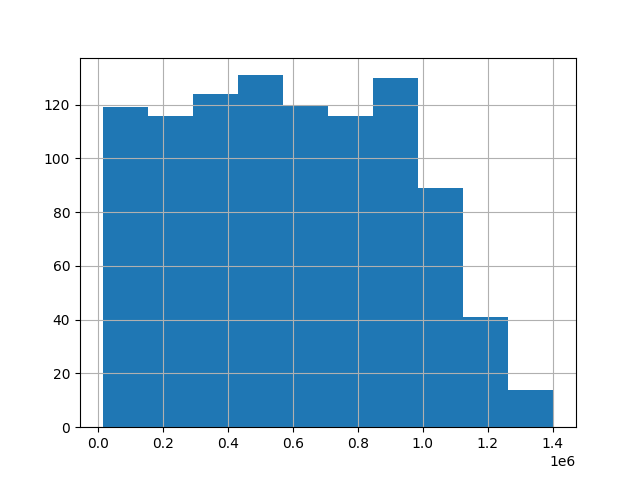

In [20]:
plt.subplots()
tps[tps.TP_plane==2].groupby('event').TP_SADC.sum().hist()
plt.show()

In [ ]:
from tpvalidator.uilities import calculate_angles  

theta_y, theta_y_U, theta_y_V, theta_xz, theta_xz_U, theta_xz_V = calculate_angles(mc.Px, mc.Py, mc.Pz, mc.P)

mc['theta_y'] = theta_y
mc['theta_yU'] = theta_y_U
mc['theta_yV'] = theta_y_V
mc['theta_xz'] = theta_xz
mc['theta_xzU'] = theta_xz_U
mc['theta_xzV'] = theta_xz_V

# Global TP/MC properties

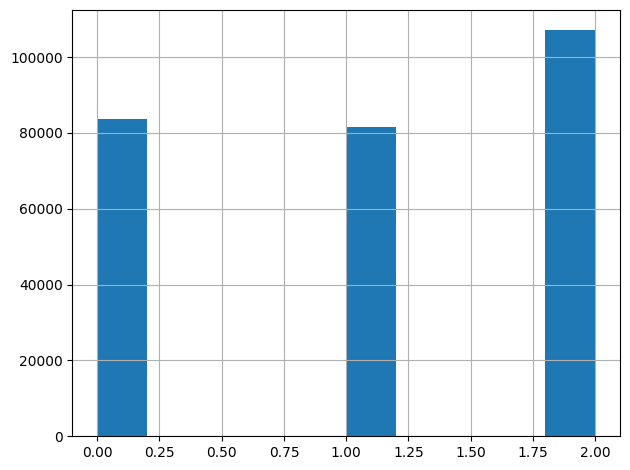

In [ ]:
plt.subplots(1,1)
tps["TP_plane"].hist()
plt.tight_layout()
plt.show()

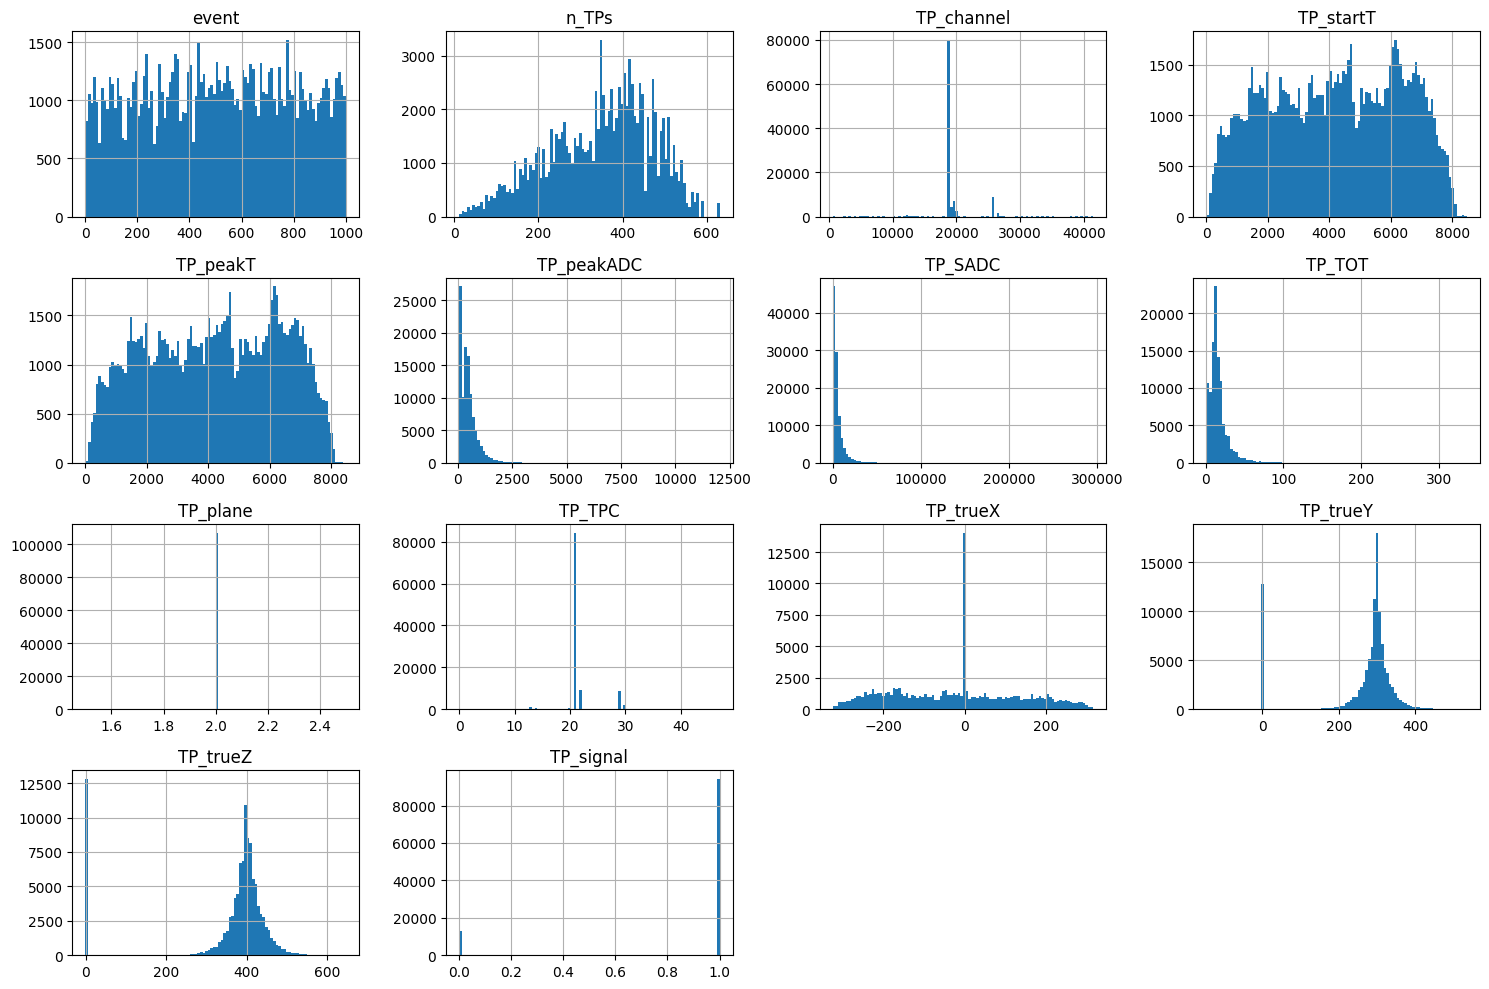

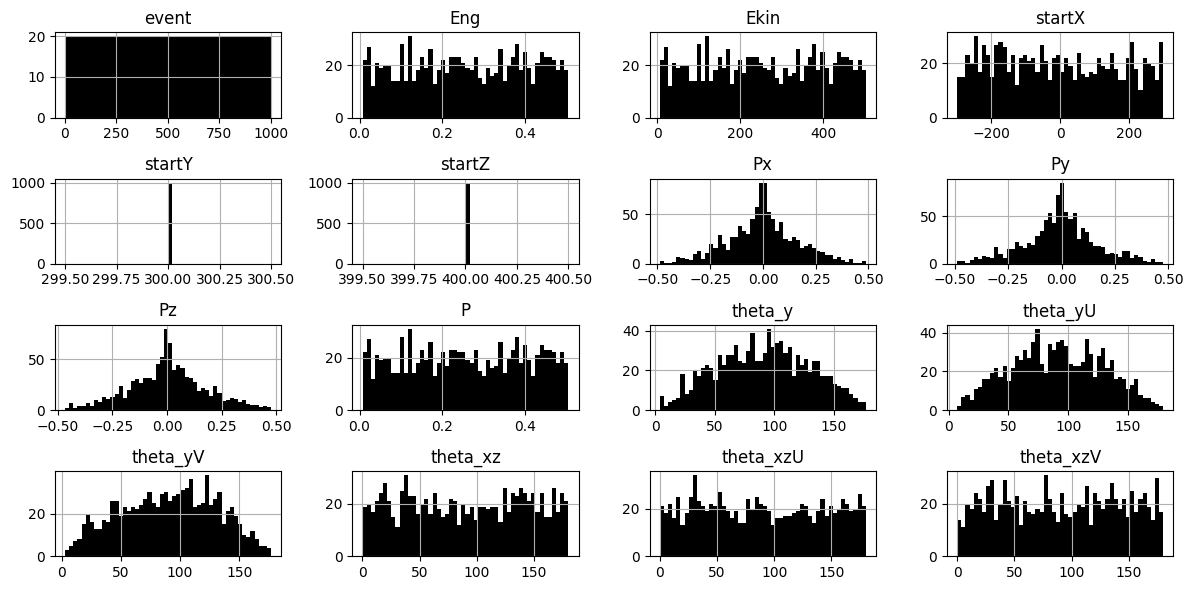

In [5]:
tps[tps.TP_plane==2].hist(bins = 100, figsize= (15,10))
plt.tight_layout()
plt.show()


mc.hist(bins = 50, figsize=(12,6), color='k')
plt.tight_layout()
plt.show()


# basic event display

/var/folders/dw/sj94s2457kl2gkb829ty4_cc0000gn/T/ipykernel_43780/2651430197.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  s = ax[plane].scatter(x.TP_channel, x.TP_peakT,s=x.TP_TOT/5, c=x.TP_SADC, label = f"{int(mcf.Ekin.values)} MeV electron")


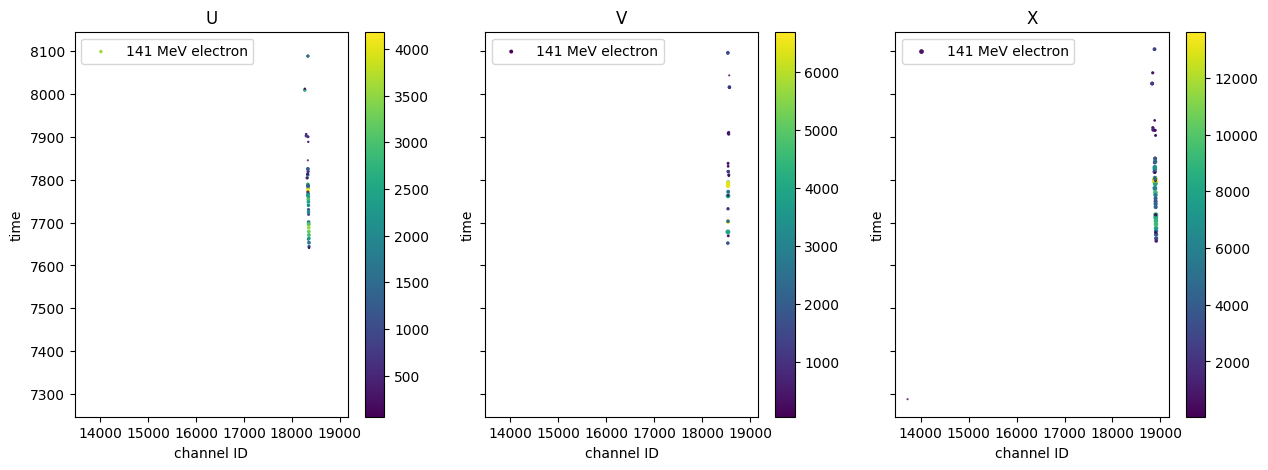

In [6]:
event =events[300]; 
title=['U','V', "X"]
mcf = mc[mc.event==event]
fig, ax = plt.subplots(1,3, figsize=(15,5), sharex = True, sharey= True)
for plane in [0,1,2]:
    x = tps[(tps.event == event) & (tps.TP_plane == plane)]
    s = ax[plane].scatter(x.TP_channel, x.TP_peakT,s=x.TP_TOT/5, c=x.TP_SADC, label = f"{int(mcf.Ekin.values)} MeV electron")
    plt.colorbar(s, ax=ax[plane])

for i in range(0,3):
    ax[i].grid(alpha=0)
    # ax[i].set_xlim(11e3,16e3)
    # ax[i].set_ylim(np.mean(x.TP_peakT.values) -500, np.mean(x.TP_peakT.values) +500 )
    ax[i].set_title(title[i])
    ax[i].set_xlabel("channel ID")
    ax[i].set_ylabel("time")
    ax[i].legend()
plt.show()

# particle energy vs visible energy from TPs

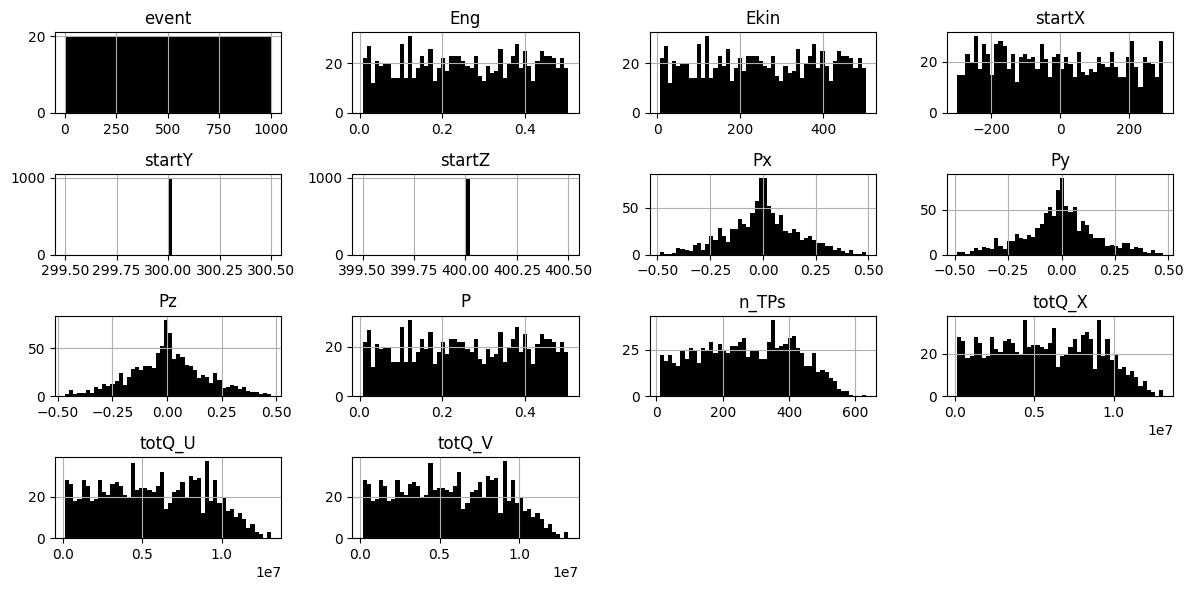

In [14]:
df_debug.hist(bins = 50, figsize=(12,6), color='k')
plt.tight_layout()
plt.show()


1000 1000


<Figure size 640x480 with 0 Axes>

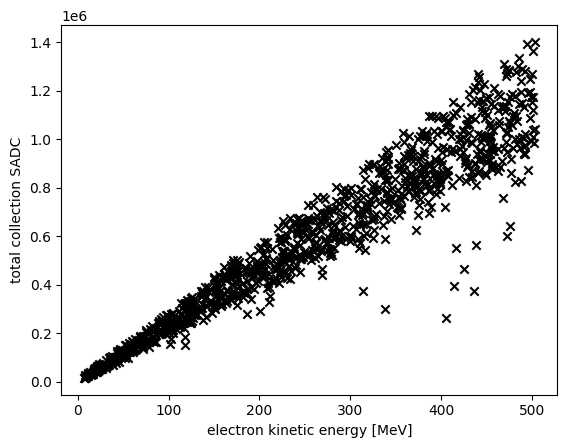

In [8]:
plt.clf()
print(f"{len(mc)} {len(tps[tps.TP_plane==2].groupby('event').TP_SADC.sum())}")
plt.subplots(1,1)
plt.scatter(mc.Ekin, tps[tps.TP_plane==2].groupby('event').TP_SADC.sum(), c='k', marker='x')
plt.ylabel("total collection SADC")
plt.xlabel("electron kinetic energy [MeV]")
plt.show()


# Comparing TP in collection vs. induction plane

Text(0.5, 0, 'Total induction SADC per event')

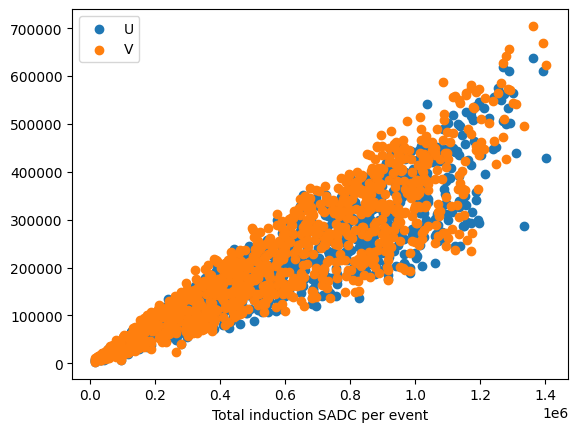

In [9]:
plt.clf()

plt.scatter(tps[tps.TP_plane==2].groupby('event').TP_SADC.sum(), tps[tps.TP_plane==0].groupby('event').TP_SADC.sum() , label ='U')
plt.scatter(tps[tps.TP_plane==2].groupby('event').TP_SADC.sum(), tps[tps.TP_plane==1].groupby('event').TP_SADC.sum() , label ='V')
plt.legend()
plt.xlabel("Total collection SADC per event")
plt.xlabel("Total induction SADC per event")
